In [35]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime, date, timedelta
import numpy as np
from scipy import stats

In [36]:
def predict(ticker):
    interval='2m' # Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
    backdays=1
    st = stock(ticker, interval, backdays)
    df = st.getPrice(ticker, interval, backdays)
    
    # MFI (money flow index)
    look_back_period = 14  
    
    # Calculate typical price for each day
    df['Typical Price'] = (df['Open']+df['High'] + df['Low'] + df['Close']) / 4
    
    # Calculate raw money flow (RMF)
    df['Raw Money Flow'] = df['Typical Price'] * df['Volume']
    
    # Calculate the money flow ratio (MFR)
    positive_money_flow = (df['Typical Price'] > df['Typical Price'].shift(1))*1*df['Raw Money Flow']
    negative_money_flow = (df['Typical Price'] < df['Typical Price'].shift(1))*1*df['Raw Money Flow']
    mfr = positive_money_flow.rolling(window=look_back_period).sum() / negative_money_flow.rolling(window=look_back_period).sum()
    
    # Calculate the Money Flow Index (MFI)
    mfi = 100 - (100 / (1 + mfr))
    
    # Add the MFI column to the DataFrame
    df['MFI'] = mfi

    # calculate confidence
    # linear interpolation between MFI 30 and 70
    # Sell when the MFI rises above 70 as it indicates an overbought condition and buy when the MFI falls below 30 as it indicates an oversold condition.
    # at MFI=30, confidence=100 to buy, at MFI=70, confidence=-100 
    # confidence = (-5)*MFI + 250

    # waited MFI to include past 3 MFI
    weighted_mfi = (df['MFI'].iloc[-1]*(4)+df['MFI'].iloc[-2]*(3)+df['MFI'].iloc[-3]*(2) + df['MFI'].iloc[-4]*(1))/10

    print(df.MFI.tail(4))
    
    confidence = weighted_mfi*(-5) + 250

    if confidence > 100: 
        confidence=100
        
    if confidence < -100: 
        confidence=-100
    

    if confidence>40:
        print(f'BUY : with Confidence {confidence}')
    elif confidence<-40:
        print(f'SELL : with Confidence {abs(confidence)}')
    else:
        print(f'HOLD : with Confidence {abs(confidence)}')
        

In [37]:
tickers = ['msft', 'wmt', 'ba', 'rtx','tm', 'uso', 'voo']

for ticker in tickers:
    print('\n')
    predict(ticker)

AttributeError: 'Ticker' object has no attribute 'replace'

In [38]:
import yahoo_fin.stock_info as si


In [39]:
df17 = si.get_data('voo', interval='1d', start_date="01/01/2017" , end_date="31/12/2017")
df18 = si.get_data('voo', interval='1d', start_date="01/01/2018" , end_date="31/12/2018")
df19 = si.get_data('voo', interval='1d', start_date="01/01/2019" , end_date="31/12/2019")
df20 = si.get_data('voo', interval='1d', start_date="01/01/2020" , end_date="31/12/2020")
df21 = si.get_data('voo', interval='1d', start_date="01/01/2021" , end_date="31/12/2021")
df22 = si.get_data('voo', interval='1d', start_date="01/01/2022" , end_date="31/12/2022")
df23 = si.get_data('voo', interval='1d', start_date="01/01/2023" , end_date="31/12/2023")

In [40]:
df17['gain'] = df17['close'] - df17['open'] >=0
df18['gain'] = df18['close'] - df18['open'] >=0
df19['gain'] = df19['close'] - df19['open'] >=0
df20['gain'] = df20['close'] - df20['open'] >=0
df21['gain'] = df21['close'] - df21['open'] >=0
df22['gain'] = df22['close'] - df22['open'] >=0
df23['gain'] = df23['close'] - df23['open'] >=0


In [41]:
df21.shape , df22.shape, df23.shape

((251, 8), (251, 8), (250, 8))

In [42]:
df21.head()
x1 = list(range(len(df17)))
x2 = list(range(len(df18)))
x3 = list(range(len(df19)))
x4 = list(range(len(df20)))
x5 = list(range(len(df21)))
x6 = list(range(len(df22)))
x7 = list(range(len(df23)))


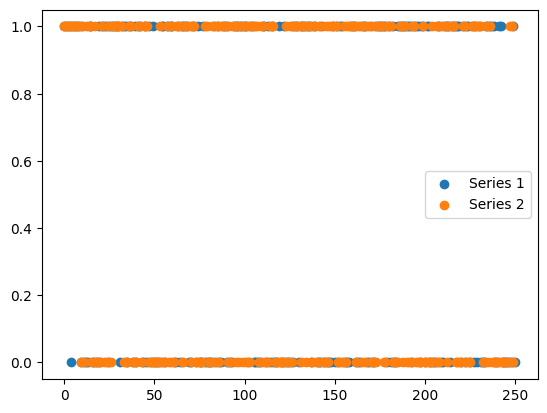

In [43]:
plt.scatter(x1, df17['gain'], label='Series 1')
plt.scatter(x2, df18['gain'], label='Series 2')
# plt.plot(x3, df19['open'], label='Series 3')
# plt.plot(x4, df20['open'], label='Series 4')
# plt.plot(x5, df21['open'], label='Series 5')
# plt.plot(x6, df22['open'], label='Series 6')
# plt.plot(x7, df23['open'], label='Series 7')
plt.legend()

plt.show()

In [44]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")       

In [45]:
ticker='msft'
interval='1d' # Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
backdays=1000

df = getPrice(ticker, interval, backdays)

df['Typical Price'] = (df['Open']+df['High'] + df['Low'] + df['Close']) / 4

df['Change'] = (df['Close']-df['Open'])/df['Open']

In [46]:
df['day'] = df.index.weekday

In [47]:
mon = df[df['day']==0]
tue = df[df['day']==1]
wed = df[df['day']==2]
thu = df[df['day']==3]
fri = df[df['day']==4]

In [48]:
mon.shape

(124, 9)

check_normality: Null hypothesis=The data was drawn from a normal distribution

if p value is < 0.05 (2 tail), means we reject null => data has pattern and not noraml distribution
else data is random and normal.

In [49]:
print('Monday')
check_normality(mon['Change'])
print('\n\nTuesday')
check_normality(tue['Change'])
print('\n\nWednesday')
check_normality(wed['Change'])
print('\n\nThursday')
check_normality(thu['Change'])
print('\n\nFriday')
check_normality(fri['Change'])

Monday
p value:0.8927
Fail to reject null hypothesis >> The data is normally distributed


Tuesday
p value:0.4580
Fail to reject null hypothesis >> The data is normally distributed


Wednesday
p value:0.0111
Reject null hypothesis >> The data is not normally distributed


Thursday
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


Friday
p value:0.7115
Fail to reject null hypothesis >> The data is normally distributed


Wednesday shows p-value near 0.05 => some pattern is observed in people's behavior. But weak support. 

In [50]:
thu['Change'].describe()

count    140.000000
mean       0.000895
std        0.018038
min       -0.048897
25%       -0.007660
50%        0.001063
75%        0.010920
max        0.081024
Name: Change, dtype: float64

<Axes: >

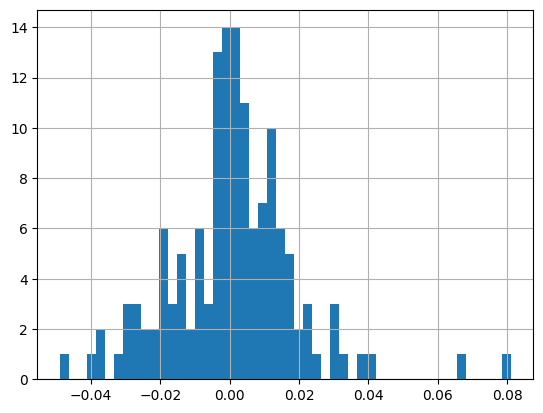

In [51]:
thu['Change'].hist(bins=50)

In [52]:
x=yf.Ticker('BRWM.L')
x.info

HTTPError: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/BRWM.L?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true